In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import signalnet as sn
import pandas as pd

In [2]:
df = pd.read_csv("multi_wave.csv")
df = df.iloc[:80000, :]

In [3]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up(X_train, X_test, y_train, y_test)

In [5]:
X_train.shape

(39992, 9)

In [6]:
model = keras.Sequential()

In [7]:
model.add(layers.LSTM(9,input_shape=(9,1), return_sequences=False))
model.add(layers.Dense(2,kernel_initializer="normal",activation="linear"))
model.add(layers.Dense(1,kernel_initializer="normal",activation="linear"))
model.compile(loss="mse",optimizer ="adam",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10,batch_size=5,validation_split=0.05)

Epoch 1/10


2023-02-28 11:51:53.146735: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7599/7599 [==============================] - 12s 2ms/step - loss: 3.9600e-04 - accuracy: 0.0000e+00 - val_loss: 1.3738e-07 - val_accuracy: 0.0000e+00
Epoch 2/10
7599/7599 [==============================] - 11s 1ms/step - loss: 4.8483e-06 - accuracy: 0.0000e+00 - val_loss: 1.1497e-07 - val_accuracy: 0.0000e+00
Epoch 3/10
7599/7599 [==============================] - 11s 1ms/step - loss: 3.9384e-06 - accuracy: 0.0000e+00 - val_loss: 1.2858e-06 - val_accuracy: 0.0000e+00
Epoch 4/10
7599/7599 [==============================] - 11s 1ms/step - loss: 3.0469e-06 - accuracy: 0.0000e+00 - val_loss: 1.4063e-06 - val_accuracy: 0.0000e+00
Epoch 5/10
7599/7599 [==============================] - 12s 2ms/step - loss: 2.7250e-06 - accuracy: 0.0000e+00 - val_loss: 1.0115e-05 - val_accuracy: 0.0000e+00
Epoch 6/10
7599/7599 [==============================] - 11s 1ms/step - loss: 2.8170e-06 - accuracy: 0.0000e+00 - val_loss: 4.4661e-07 - val_accuracy: 0.0000e+00
Epoch 7/10
7599/7599 [=======================

In [8]:
predictions = model.predict(X_test)

1250/1250 [==============================] - 1s 521us/step


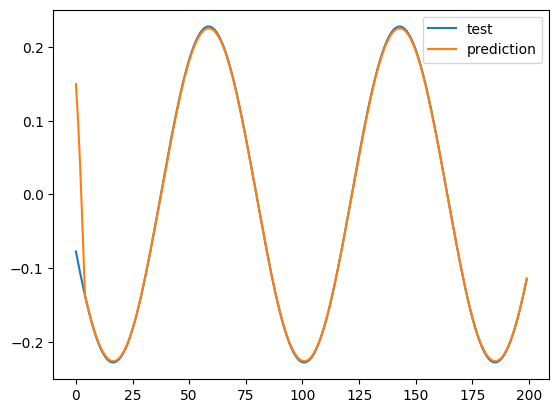

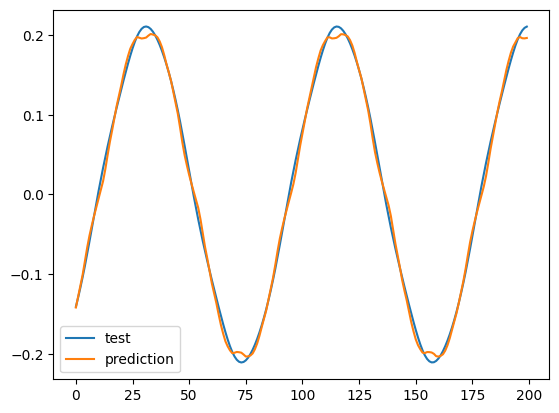

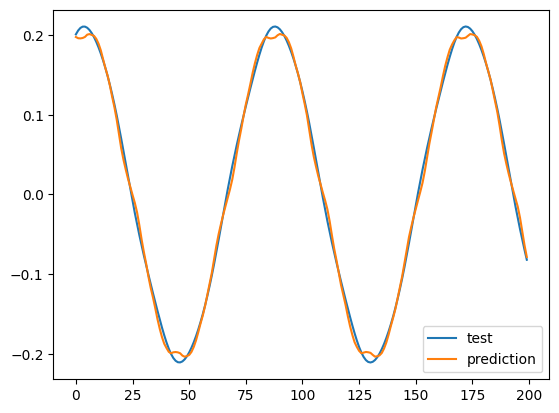

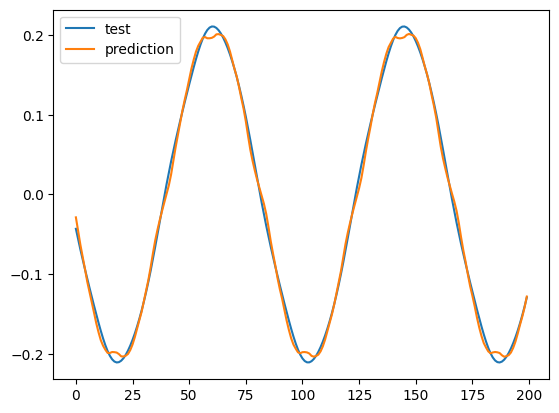

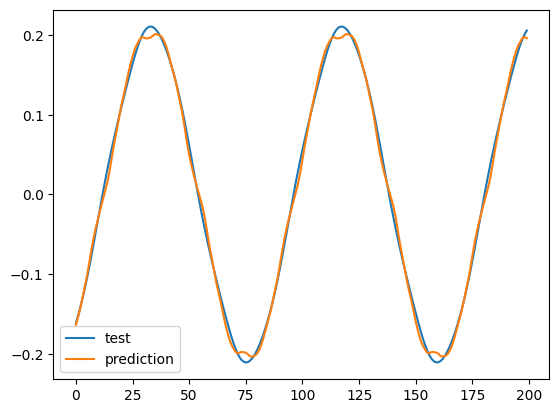

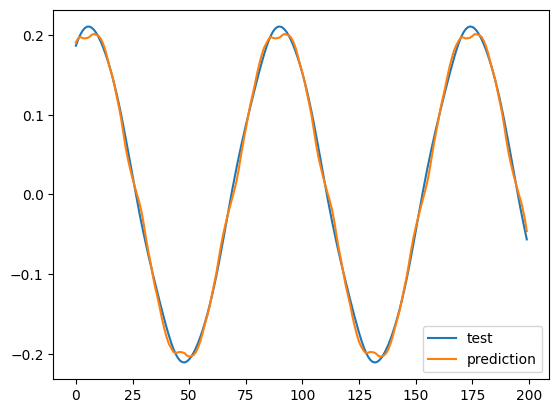

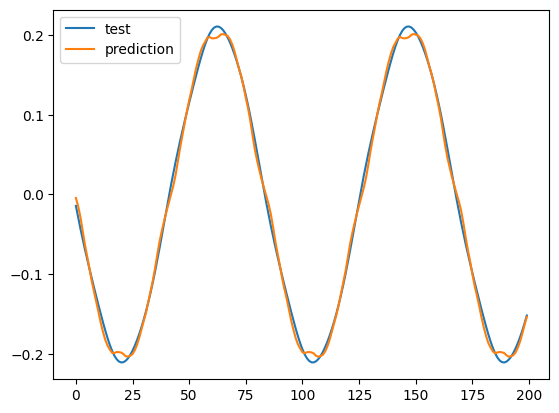

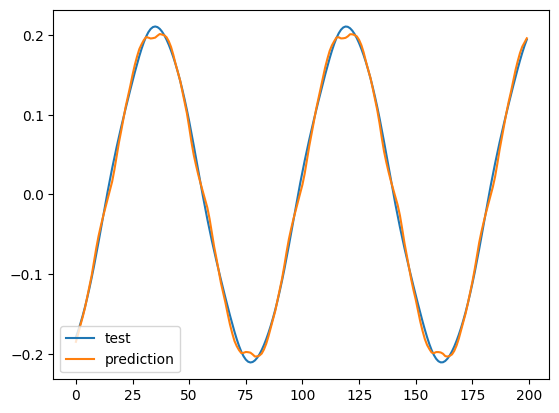

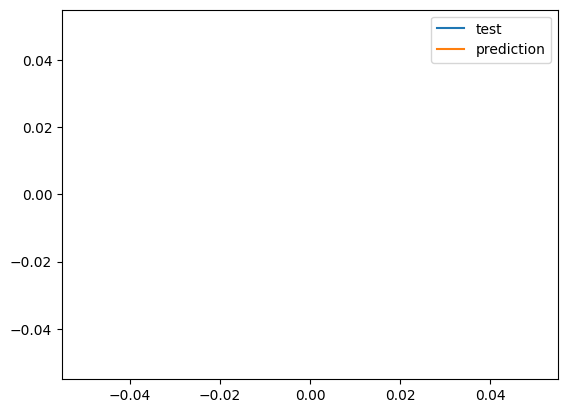

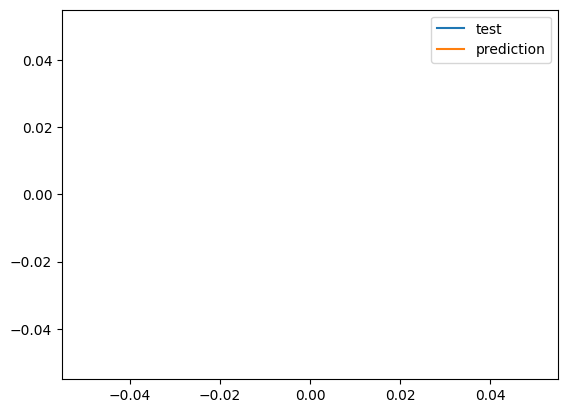

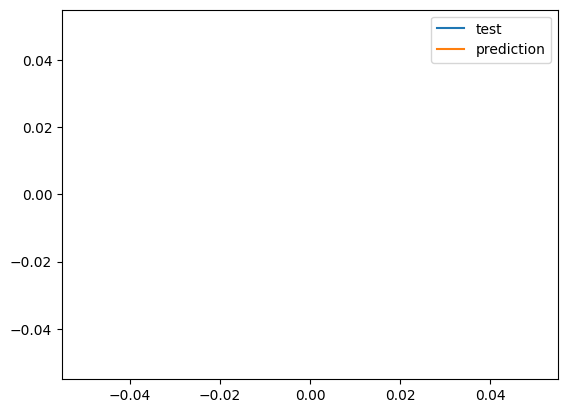

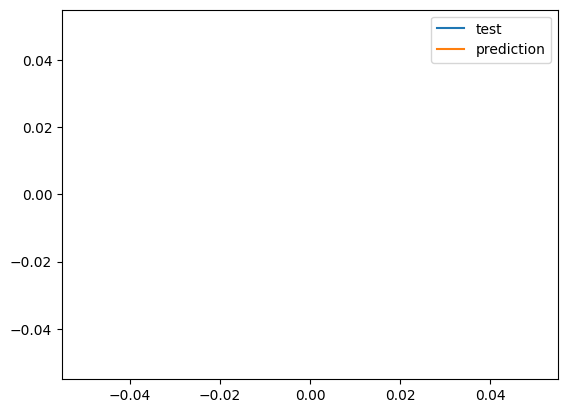

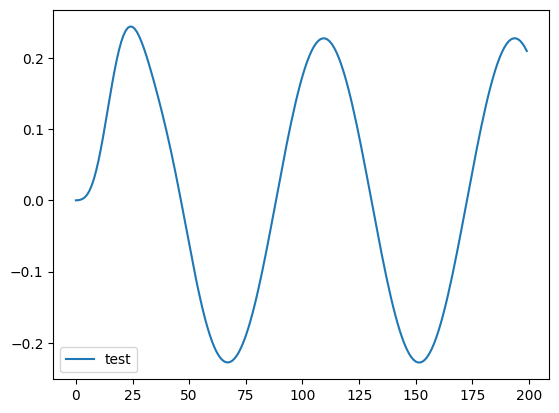

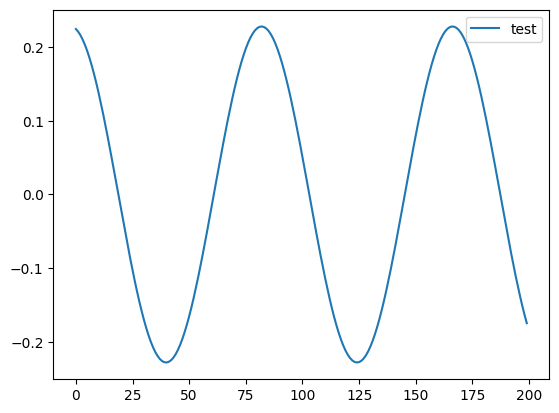

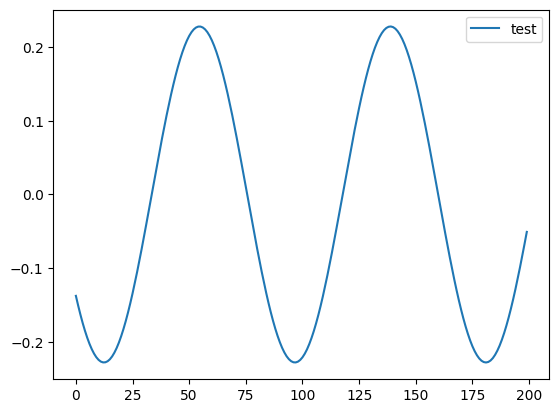

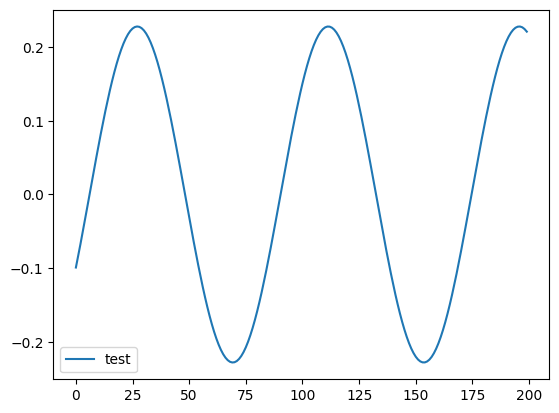

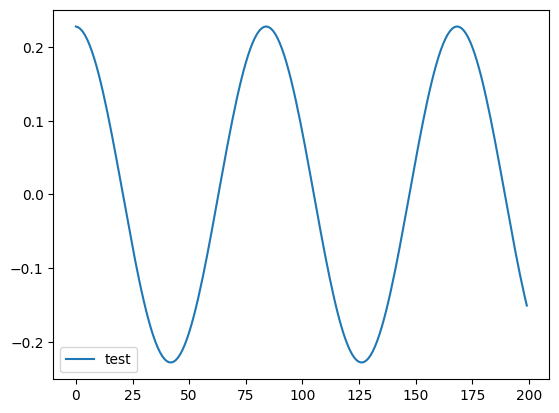

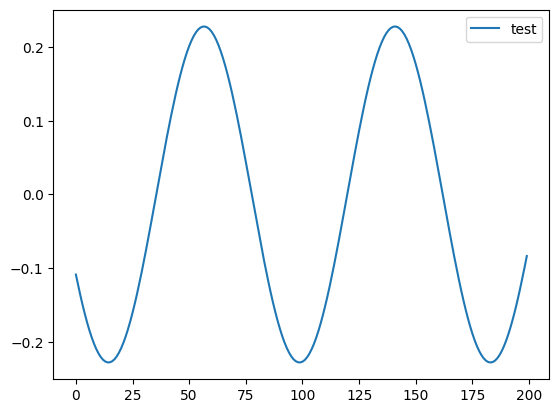

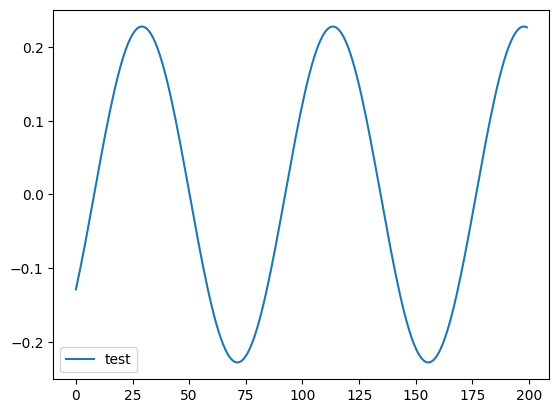

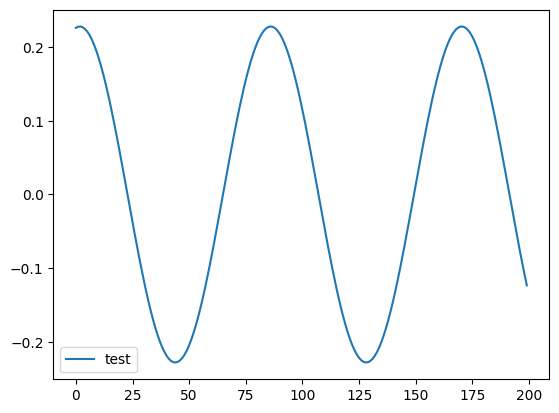

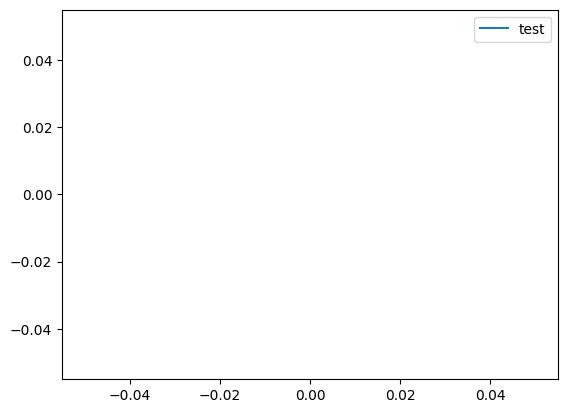

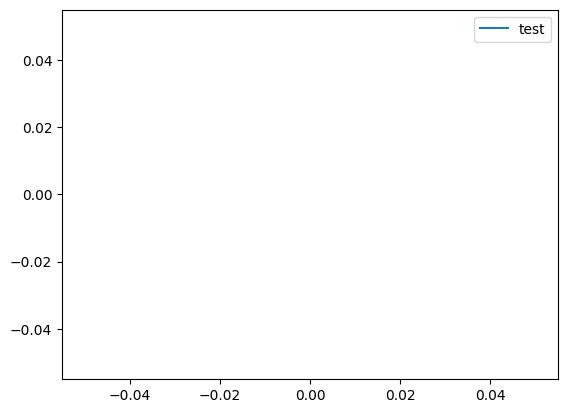

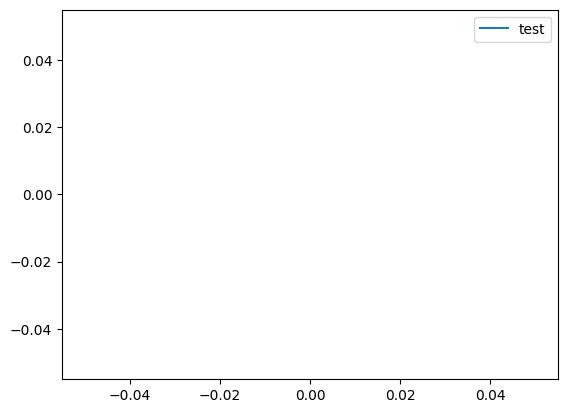

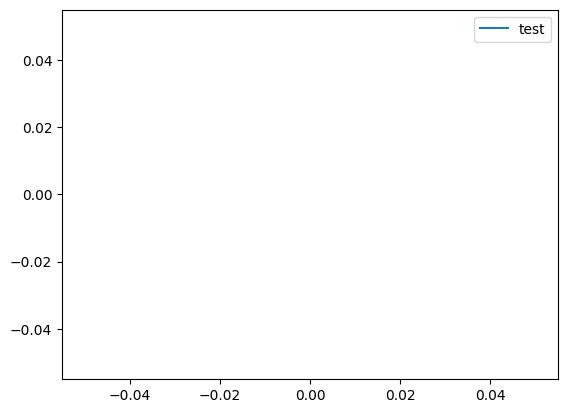

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

for i in range(0, 60000, 5000):
    plt.plot(y_test[i:i+200], label="test")
    plt.plot(predictions.flatten()[i:i+200], label="prediction")
    plt.legend()
    plt.show()
    plt.clf()

for i in range(0, 60000, 5000):
    plt.plot(y_train[i:i+200], label="test")
    plt.legend()
    plt.show()
    plt.clf()


In [10]:
errors = []
for idx, item in enumerate(y_test):
    errors.append(np.square(item-predictions.flatten()[idx]))

mse = sum(errors)/len(errors)

In [11]:
mse

5.485446743081354e-05